In [1]:
!pip install ipympl
import pyabf
import matplotlib.pyplot as plt
%matplotlib widget
from math import *
from matplotlib.backend_bases import MouseButton
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

file_path = "bursting/cell89basal.abf"

abf = pyabf.ABF(file_path) 
print(abf)



ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


In [2]:
print(f"File Path: {abf.abfFilePath} ")
print(f"File version: {abf.abfVersionString}")
print(f"Sampling rate:  {abf.dataRate} Hz")
print(f"{'Sampling Rate:'} {abf.dataRate} Hz")
print(f"Totalsweeps {abf.sweepCount}")
print(abf.dacNames)
print(abf.adcNames)
print(f"Channel units {abf.sweepUnitsY}")


File Path: c:\Users\manur\Desktop\python\bursting\cell89basal.abf 
File version: 2.6.0.0
Sampling rate:  10000 Hz
Sampling Rate: 10000 Hz
Totalsweeps 30
['AO #0']
['Waveform']
Channel units pA


In [3]:
print(abf.sweepY)
print(abf.sweepC)

[-61.2   -60.856 -61.2   ... -56.228 -56.196 -56.353]
[0. 0. 0. ... 0. 0. 0.]


In [4]:
print("list of sweeps",",".join(map(str, abf.sweepList)))

list of sweeps 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29


In [5]:
sweep_index = 29
abf.setSweep(sweep_index)
print(abf.sweepY)
print(abf.sweepC)
print(abf.adcNames)
print(abf.dacNames)


[-53.132 -53.007 -53.132 ... -53.1   -53.1   -53.038]
[0. 0. 0. ... 0. 0. 0.]
['Waveform']
['AO #0']


In [6]:
data = abf.sweepY
stats = {
"Mean":np.mean(data),
"Median":np.median(data),
"Min":np.min(data),
"Max":np.max(data),
"Standard Dev":np.std(data),
"Range":np.ptp(data),
}

print("\nBasic Stadistics")
for i, j in stats.items():
    print(f"{i}: {j}")



Basic Stadistics
Mean: -53.06989288330078
Median: -53.78799819946289
Min: -60.73099899291992
Max: 44.375
Standard Dev: 4.5857253074646
Range: 105.10600280761719


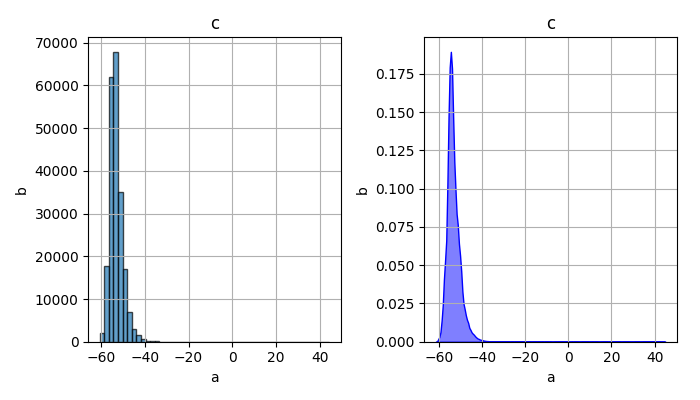

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig , axes = plt.subplots(1,2,figsize = (7,4))

axes[0].hist(data, bins = 50, edgecolor = 'black', alpha =0.7)
axes[0].set_xlabel("a")
axes[0].set_ylabel("b")
axes[0].set_title("c")
axes[0].grid(True)

sns.kdeplot(
 data,
 bw_adjust = 0.5,
 fill= True,
 color= "b",
 alpha= 0.5,
 ax=axes[1]
)
axes[1].set_xlabel("a")
axes[1].set_ylabel("b")
axes[1].set_title("c")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [8]:
def plot_abf():
    plt.figure(figsize= (8,5))

    for i in abf.sweepList:
        abf.setSweep(i)
        offset= 140*i
        plt.plot(abf.sweepX, abf.sweepY+offset,color="b",lw=0.1)
    
    plt.gca().get_yaxis().set_visible(False)
    plt.title(file_path)
    plt.xlabel(abf.sweepLabelX)
    plt.show()
    

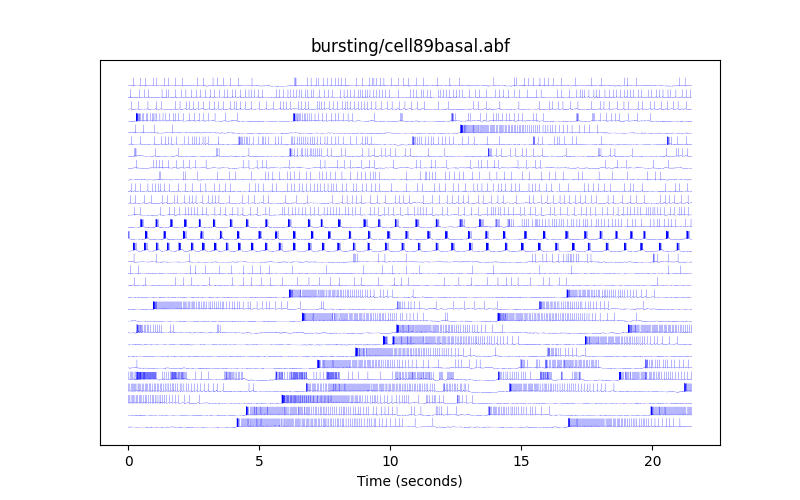

In [9]:
plot_abf()

In [ ]:
file_path = "bursting/cell89basal.abf"  # Select the ABF file
abf = pyabf.ABF(file_path)  # Load it
print(abf)  # Record characteristics

def plot_abf():
    plt.figure(figsize=(8, 5))

    # Plot every sweep with vertical offset
    for sweepNumber in abf.sweepList:
        abf.setSweep(sweepNumber)
        offset = 140 * sweepNumber
        plt.plot(abf.sweepX, abf.sweepY + offset, color='b', lw=0.1)  # Recorded voltage
        plt.plot(abf.sweepX, abf.sweepC + offset, color='r', lw=0.5)  # Command waveform in red

    # Decorate the plot
    plt.gca().get_yaxis().set_visible(False)  # Hide Y axis
    plt.title(file_path)
    plt.xlabel(abf.sweepLabelX)
    plt.show()

plot_abf()

ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


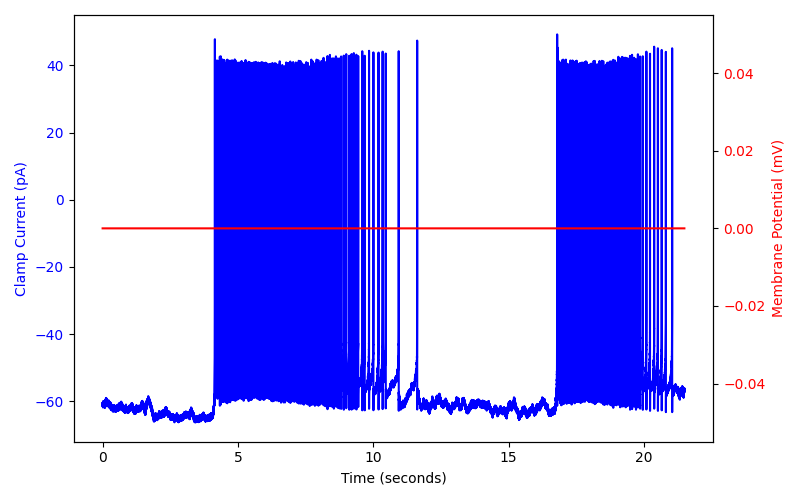

In [ ]:
import pyabf  # Load pyABF
import matplotlib.pyplot as plt

file_path = "bursting/cell89basal.abf"  # Select the ABF file
abf = pyabf.ABF(file_path)  # Load it
print(abf)  # Record characteristics


# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the recorded curve (ADC) on the left axis
ax1.plot(abf.sweepX, abf.sweepY, color='b', label="ADC waveform")
ax1.set_xlabel(abf.sweepLabelX)
ax1.set_ylabel(abf.sweepLabelY, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the control curve (DAC)
ax2 = ax1.twinx()
ax2.plot(abf.sweepX, abf.sweepC, color='r', label="DAC waveform")
ax2.set_ylabel(abf.sweepLabelC, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Improve the layout
fig.tight_layout()
plt.show()

Deteccion de SPIKES

In [ ]:
import numpy as np
import pandas as pd

import pyabf

import scipy
from scipy import signal
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import skew, kurtosis

import matplotlib.pyplot as plt

In [ ]:
data = file_path
abf = pyabf.ABF(data)
print(abf)

ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


In [ ]:
#filtrado de señales
fs = int(abf.dataPointsPerMs*1000)

b_lowpass, a_lowpass = signal.bessel(4,
                                     2000,
                                     'low',
                                     analog = False,
                                     norm = 'phase',
                                     fs = fs)

signal_filtered = signal.filtfilt(b_lowpass, a_lowpass, abf.sweepY)

In [ ]:
#Deteccion de picos
time = abf.sweepX
peaks_signal = abf.sweepY
abf.setSweep(15)

thresh_min = -25                    # Min threshold to detect spikes
thresh_prominence = 15              # Min spike amplitude  
thresh_min_width = 0.5 * (fs/1000)  # Min required width in ms
distance_min = 1 * (fs/1000)        # Min horizontal distance between peaks
pretrigger_window = (1.5 * fs)/1000
posttrigger_window = (2 * fs)/1000

peaks, peaks_dict = find_peaks(peaks_signal, 
           height=thresh_min, 
           threshold=thresh_min,  
           distance=distance_min,  
           prominence=thresh_prominence,  
           width=thresh_min_width, 
           wlen=None,       # Window length to calculate prominence
           rel_height=0.5,  # Relative height at which the peak width is measured
           plateau_size=None)

spikes_table = pd.DataFrame(columns = ['spike', 'spike_index', 'spike_time',
                                       'inst_freq', 'isi_s',
                                       'width', 'rise_half_ms', 'decay_half_ms',
                                       'spike_peak', 'spike_amplitude'])
 
spikes_table.spike = np.arange(1, len(peaks) + 1)
spikes_table.spike_index = peaks
spikes_table.spike_time = peaks / fs  # Divided by fs to get s
spikes_table.isi_s = np.diff(peaks, axis=0, prepend=peaks[0]) / fs
spikes_table.inst_freq = 1 / spikes_table.isi_s
spikes_table.width = peaks_dict['widths']/(fs/1000) # Width (ms) at half-height
spikes_table.rise_half_ms = (peaks - peaks_dict['left_ips'])/(fs/1000) 
spikes_table.decay_half_ms = (peaks_dict['right_ips'] - peaks)/(fs/1000)
spikes_table.spike_peak = peaks_dict['peak_heights']  # height parameter is needed
spikes_table.spike_amplitude = peaks_dict['prominences']  # prominence parameter is needed



In [ ]:
#Exportar
fig.savefig('bursting/cell89basal.png', dpi=300)
spikes_table.to_csv('bursting/cell89basal_spike_table.csv', index=False)